In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_8a1fa1be8fba4c4aa84b5e3bbc5502f1 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_8a1fa1be8fba4c4aa84b5e3bbc5502f1 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_8a1fa1be8fba4c4aa84b5e3bbc5502f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9RXjmaWQ9cJoBovlxPh7-ubMfSywhm199o5ojEQSFkda',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_8a1fa1be8fba4c4aa84b5e3bbc5502f1)

body = client_8a1fa1be8fba4c4aa84b5e3bbc5502f1.get_object(Bucket='diabetesbinaryclassification-donotdelete-pr-ijl0xw1tcnprps',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df_data_1.shape

(768, 9)

In [4]:
y = df_data_1.iloc[:,-1]
X = df_data_1.iloc[:, :-1]

In [5]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:8]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [10]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.65961041, 0.34038959],
       [0.73966496, 0.26033504],
       [0.74766502, 0.25233498],
       [0.53606489, 0.46393511],
       [0.6444513 , 0.3555487 ],
       [0.31463595, 0.68536405],
       [0.48475665, 0.51524335],
       [0.47879495, 0.52120505],
       [0.21424296, 0.78575704],
       [0.65651099, 0.34348901],
       [0.47163455, 0.52836545],
       [0.79722399, 0.20277601],
       [0.63960229, 0.36039771],
       [0.80203658, 0.19796342],
       [0.71898137, 0.28101863],
       [0.42375828, 0.57624172],
       [0.2408732 , 0.7591268 ],
       [0.21869962, 0.78130038],
       [0.81639327, 0.18360673],
       [0.80457111, 0.19542889],
       [0.7258526 , 0.2741474 ],
       [0.3961124 , 0.6038876 ],
       [0.59889891, 0.40110109],
       [0.29776746, 0.70223254],
       [0.68156229, 0.31843771],
       [0.57859534, 0.42140466],
       [0.75755135, 0.24244865],
       [0.50632493, 0.49367507],
       [0.62415877, 0.37584123],
       [0.66993753, 0.33006247],
       [0.

In [12]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7083333333333334

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34 18]
 [17 85]]


Confusion matrix, without normalization
[[34 18]
 [17 85]]


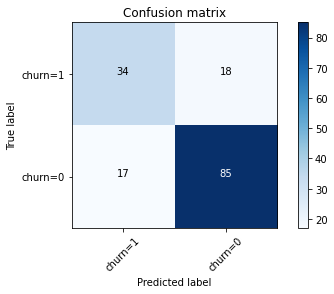

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [15]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.67      0.65      0.66        52

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [16]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5177367118020171